In [4]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [210]:
X = df.drop(columns='price')
y = df['price']

In [211]:
X.shape, y.shape

((8495, 8), (8495,))

## 1.2 Split the data into test and train datasets using train_test_split

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=31337)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [213]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [214]:
print(" "*8 + "feature | coeff")
print(" "*3 + "-"*28)
for coeff, feature in zip(regressor.coef_, X.columns.values):
    print("{:>15} | {}".format(feature, coeff))

        feature | coeff
   ----------------------------
           make | -39.29294366716088
           body | -1548.0059077492338
        mileage | -44.79856956656613
           engV | 295.91391280582377
        engType | -1334.4539818097035
   registration | 3966.3704753800475
           year | 1109.409511670881
          drive | 8589.573347405909


In [215]:
print("bias:", regressor.intercept_)

bias: -2205420.96373


## 1.5 Use the test data to make predictions

In [216]:
y_pred = regressor.predict(X_test)

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [218]:
print("RMSE:", mean_squared_error(y_test, y_pred))

RMSE: 415573054.69


In [219]:
print("R^2:", r2_score(y_test, y_pred))

R^2: 0.29196055696


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

Each coefficient in the linear regression model represents the degree to which we expect $y$ to change when we vary the corresponding feature by $1$. So, if we vary the `year` by one, we expect the predicted value to change by an amount equal to the coefficient of the `year` feature.

## 1.8 How should we interpret the Root-Mean-Square Error?

The Root-Meat-Square Error (RMSE) is how we determine the degree to which our predicted values vary around the true values. The value given by the RMSE is hard to interpret on it's own, and is most useful as a means of comparing the degree of fit in both the training and testing models generated. Below, for example, we can see that the training and testing error are relatively similar, indicating that while we haven't fully generalized our model, we haven't over-fit either. As the RMSE determines the error, a higher value for the training set as opposed to the testing set, would indicate that we under-fit the data at hand, the opposite is also true.

In [221]:
mean_squared_error(y_train, regressor.predict(X_train))

455807883.13901478

In [222]:
mean_squared_error(y_test, regressor.predict(X_test))

415573054.68983161

## 1.9 How should we interpret the $R^2$?

$R^2$ yields the degree to which some predicted values do not approximate the average of the true values. Specifically:
 - For some predicted values $\hat{y}_i$, true values $y_i$, and mean of the true values $\bar{y}$ 
 - $R^2$ is defined as $1 - {{\sum{(y_i - \hat{y}_i)^2}}\over{\sum(y_i - \bar{y})^2}}$

Dissecting that, the denominator is given us the deviation from the mean given by the true values, and the numerator shows us the deviation of the predicited values from the true values. Hence the fraction gives us the degree to which the predicted values approximate or vary to the same degree that they true values do of the mean. Of that fraction, we then take the inverse, and get the degree to which the predicted values vary differently than the true values. A good way to explore this, is to pretend that all of our predicted values are equal to the mean of the true values, it's easy to see then that $R^2$ would be 0. All that means, is that there is no degree to which the distribution - approximated to the true distribution - over which the predicted values differ from the actual. And for any other values, we can see that we get an explanation of how much different the distributions are that each the predicted and true values are respectively drawn from.

 # Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [6]:
df['log_price'] = np.log(df['price'])

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

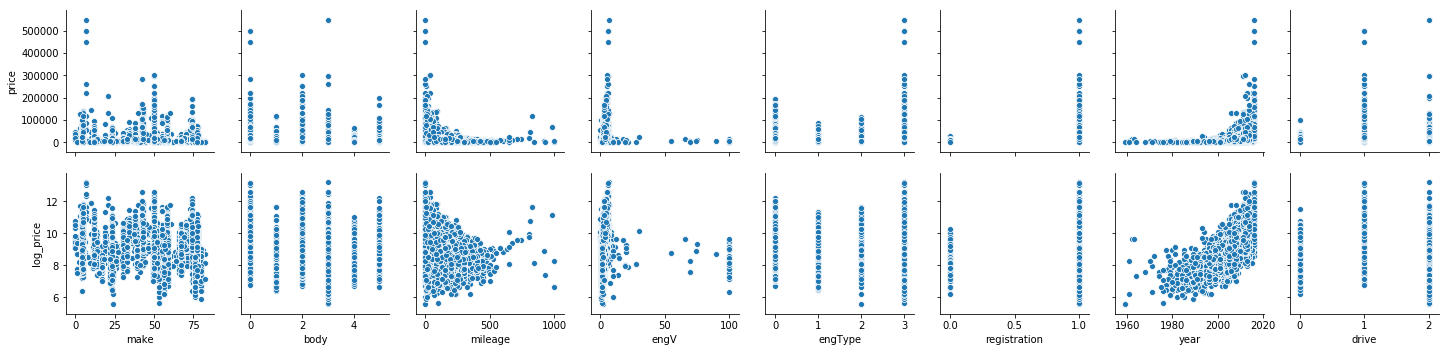

In [61]:
sns.pairplot(data=df, y_vars=['price', 'log_price'], x_vars=df.drop(columns=['log_price', 'price']).columns)

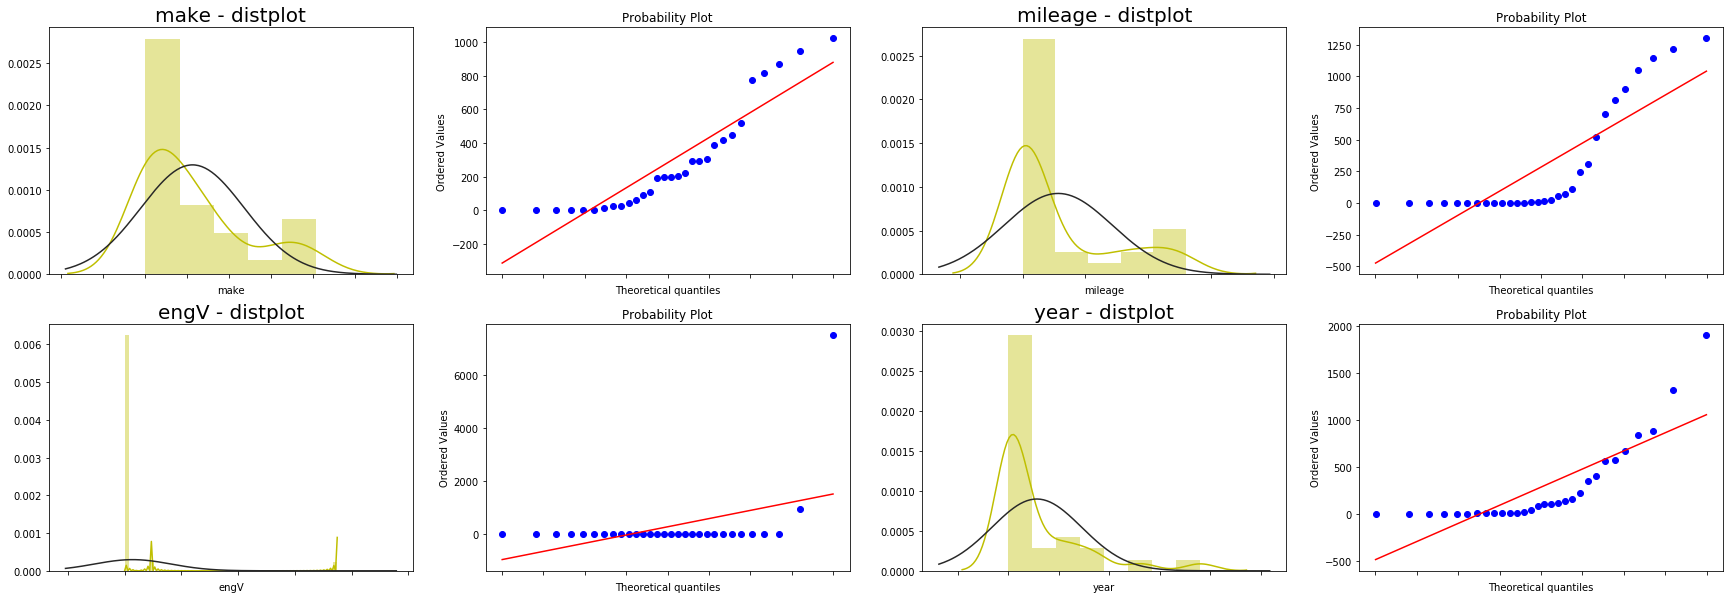

In [146]:
fig, axes = plt.subplots(2, 4, figsize=(30,10))

for column, ax in zip(['make', 'mileage', 'engV', 'year'], axes.reshape(4,2)):
    ax[0].set_title(column+" - distplot", fontsize=20)
    cuts = pd.cut(df[column], 30).value_counts()
    sns.distplot(cuts, ax=ax[0], color='y', fit=stats.norm)
    stats.probplot(cuts, plot=ax[1])
    ax[0].xaxis.set_ticklabels([])
    ax[1].xaxis.set_ticklabels([])

## 2.3 If appropriate, create any polynomial features. 

In [16]:
df['poly_engV'] = df['engV']**2
df['poly_year'] = df['year']**2
df['poly_engType'] = df['engType']**2
df['poly_mileage'] = df['mileage']**2
df['poly_registration'] = df['registration']**2

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [225]:
X = df.drop(columns=['log_price', 'price'])
y = df['log_price']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=31337)

In [227]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [228]:
y_pred = regressor.predict(X_test)

In [229]:
print(" "*8 + "feature | coeff")
print(" "*3 + "-"*28)
for coeff, feature in zip(regressor.coef_, X.columns.values):
    print("{:>15} | {}".format(feature, coeff))

print("\n")
    
print("bias:", regressor.intercept_)

        feature | coeff
   ----------------------------
           make | -0.0013683860391146968
           body | -0.07233273779339026
        mileage | 0.000816668368484973
           engV | 0.22016971820821504
        engType | -0.31647269744276485
   registration | 0.37735827247340836
           year | -5.944211463116274
          drive | 0.2647311221668678
      poly_engV | -0.002278039797675536
      poly_year | 0.001508549077782001
   poly_engType | 0.07987915372895409
   poly_mileage | -1.0731152828395707e-06
poly_registration | 0.3773582724733811


bias: 5861.65303232


In [230]:
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

RMSE: 0.233670752958
R^2: 0.745552986213


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

Because we're now fitting our model against $log(y)$, the coefficient determined for the `year` feature represents the percent change we could expect to see in $y$ were we to change `year` by $1$. To prove it, you merely need to take the percent difference between the predicted `price` before and after we increment or decrement the `year` by $1$.

In [258]:
# change in y expected per unit increase to the year
year_coeff = regressor.coef_[6]
100 * (1 - np.exp(year_coeff))

99.737903173612182

In [260]:
# demonstrating that incrementing the year by one does give the correct change
initial = np.exp(regressor.predict(X_test[:1]))
changed = np.exp(regressor.predict(X_test[:1].assign(year=X_test[:1].year+1)))

((initial - changed)/initial) * 100

array([ 99.73790317])

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Any function $f: \mathbb{R}^n\rightarrow\mathbb{R}^m$. Typically you would specify a hypothesis function $h$, which acts to minimize some error function embedded within the hypothesis, such that the gradient descents algorithm will traverse the space formed by mapping arbitrary inputs to outputs determined by an error until it find's a minimum, thereby minimizing the error at hand. 

## 3.2 What is the "Learning Rate" and what is its function?

The learning rate $\gamma$ is the step size taken at each iteration during gradient descent, the smaller the $\gamma$ the more nuanced the algorithm can be about it's optimization, as it move less on each iteration. However, determining the correct $\gamma$ is imporant because:
 - if $\gamma$ is too small, gradient descent will require many more iterations to reach convergence than for an optimal $\gamma$ value
 - if $\gamma$ is too large, the algorithm will jump around and have trouble converging at all

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [17]:
X = df.drop(columns=['price', 'log_price'])
y = df['log_price']

In [18]:
model = sm.OLS(y, X).fit(cov_type='HC3')

In [19]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.523e+05
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:41:37   Log-Likelihood:                -6078.6
No. Observations:                8495   AIC:                         1.218e+04
Df Residuals:                    8483   BIC:                         1.227e+04
Df Model:                          12                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
make                 -0.0012      0.00

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 13, but rank is 11
  'rank is %d' % (J, J_), ValueWarning)


## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [20]:
vif_rule_of_thumb = 10

In [73]:
vif = np.array([variance_inflation_factor(X.values, i) for i in range(X.shape[1])]) 

print("Features for which the colinearity is too high")
print("-"*46, "\n")
print("{:>53}".format("{} | {}".format("Feature", "Has a multicollinearity problem?")))
print(" "*10+"-"*23)
for feature, vif_if_too_high in zip(X.columns.values, vif > vif_rule_of_thumb):
    print("{:>18} | {}".format(feature, "Yes" if vif_if_too_high else "No"))

Features for which the colinearity is too high
---------------------------------------------- 

           Feature | Has a multicollinearity problem?
          -----------------------
              make | No
              body | No
           mileage | Yes
              engV | Yes
           engType | Yes
      registration | Yes
              year | Yes
             drive | No
         poly_engV | Yes
         poly_year | Yes
      poly_engType | Yes
      poly_mileage | No
 poly_registration | Yes
